In [ ]:
!pip install --upgrade tensorflow keras
# visualization tools
!pip install --upgrade graphviz
!winget install graphviz
# Ubuntu/Debian: sudo apt-get install graphviz
# macOS: brew install graphviz

In [1]:
import tensorflow as tf
import keras
print(tf.__version__, keras.__version__)
_ = [print(t,tf.config.list_physical_devices(t)) for t in ['CPU', 'GPU','TPU']]

2.20.0 3.11.3
CPU [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
GPU []
TPU []


[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5]
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.]


c:\Users\m.dipaolo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "simple-linear-model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Creating visualization for model: simple-linear-model
Processing input layer...
Processing layer 0: Dense
Visualization saved as 'simple-linear-model.png'


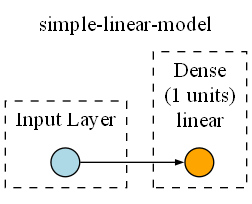

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 69.3943
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 54.3576
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 42.6692
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 33.5809
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - loss: 26.5119
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 21.0112
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 16.7285
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 13.3918
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 10.7901
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - loss: 8.7593
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - loss: 7.1720
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - loss: 5.9295
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 4.9550
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 4.1887
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - loss: 3.584

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from utils import display_nn_graph

x = np.arange(-2.0,5.0,.5,dtype=float)
y = 2*x - 1
print(x,y,sep='\n')

# create a model with one layer and one neuron
model_name = "simple-linear-model"
model = Sequential(name=model_name)
model.add(Dense(1, input_dim=1, activation='linear'))
# draw the model 
model.summary()
# image
display_nn_graph(model,model_name)

model.compile(optimizer='sgd', loss='mean_squared_error')
model.save(f'{model_name}-unfitted.keras')

model.fit(x, y,epochs=500, verbose=1)
model.save(f'{model_name}-fitted.keras')
# make a prediction
p = model.predict(x=np.array([10.0], dtype=float))

print(
    f"{p=}", 
    f"{model.layers[0].get_weights()=}",
    sep='\n')
print("- Open Netron in browser: https://netron.app/")
